In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [61]:
dfm=pd.read_csv('day.csv' )

In [62]:
dfm.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [24]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [23]:
df.describe()

,weathersit,temp,hum,windspeed,casual,registered
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367
std,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377
min,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000
25%,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000
50%,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000
75%,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000
max,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000


In [38]:
dfm.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [63]:
dft=pd.read_csv('day.csv' ,index_col='dteday' ,parse_dates=True)

In [64]:
df=dfm.loc[:,['weathersit', 'temp' ,'hum', 'windspeed', 'casual', 'registered']]

In [30]:
df.weathersit.value_counts().T

1    463
2    247
3     21
Name: weathersit, dtype: int64

### Visualization


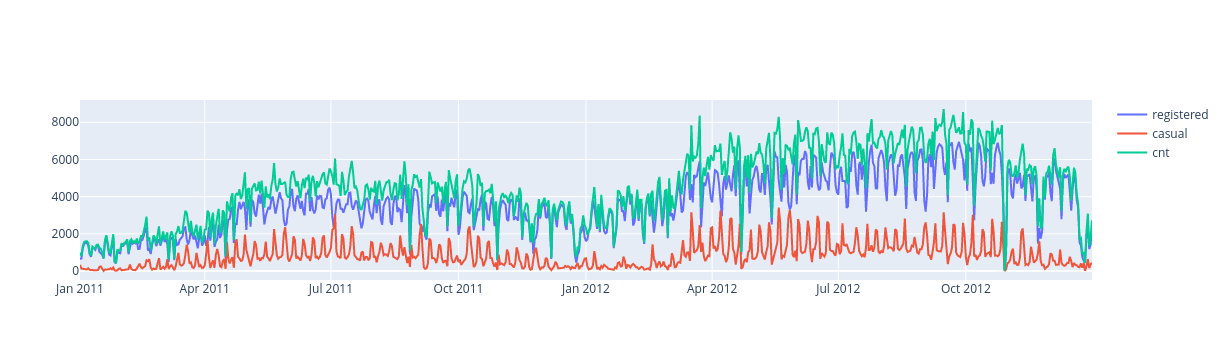

In [20]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=dft.index, y=dft.registered,  name="registered", yaxis='y'))
fig.add_trace(go.Scatter(x=dft.index, y=dft.casual ,  name="casual"))
fig.add_trace(go.Scatter(x=dft.index, y=dft.cnt ,  name="cnt"))

fig.show() 

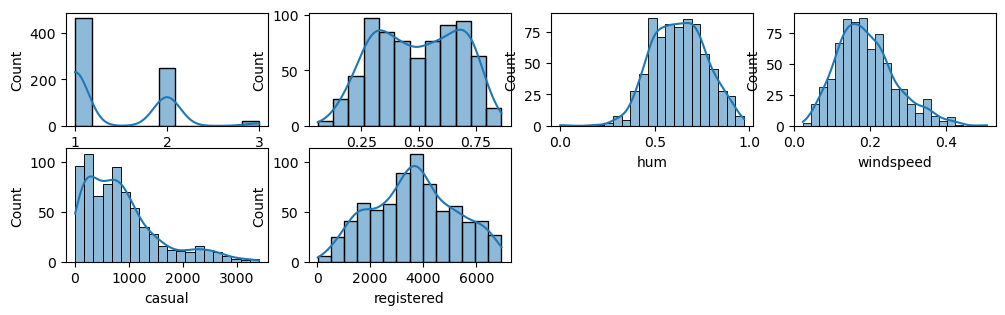

In [34]:
plt.figure(figsize=(12, 5))
no=340
for col in df.columns:
    no+=1
    plt.subplot(no)
    sns.histplot(df[col] , kde=True)  
    if no == 349:
        break

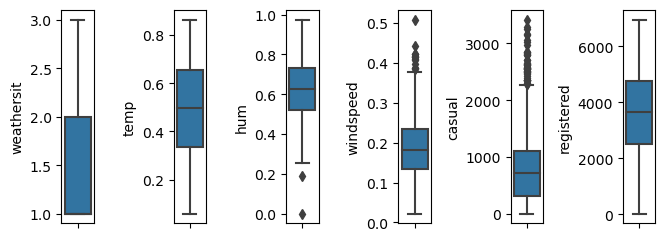

In [37]:
plt.figure(figsize=(9,5 ))
no=0
for col in df.columns:
    no+=1
    plt.subplot(2,8,no)
    plt.tight_layout()
    sns.boxplot(y=df[col])  

<Figure size 600x600 with 0 Axes>

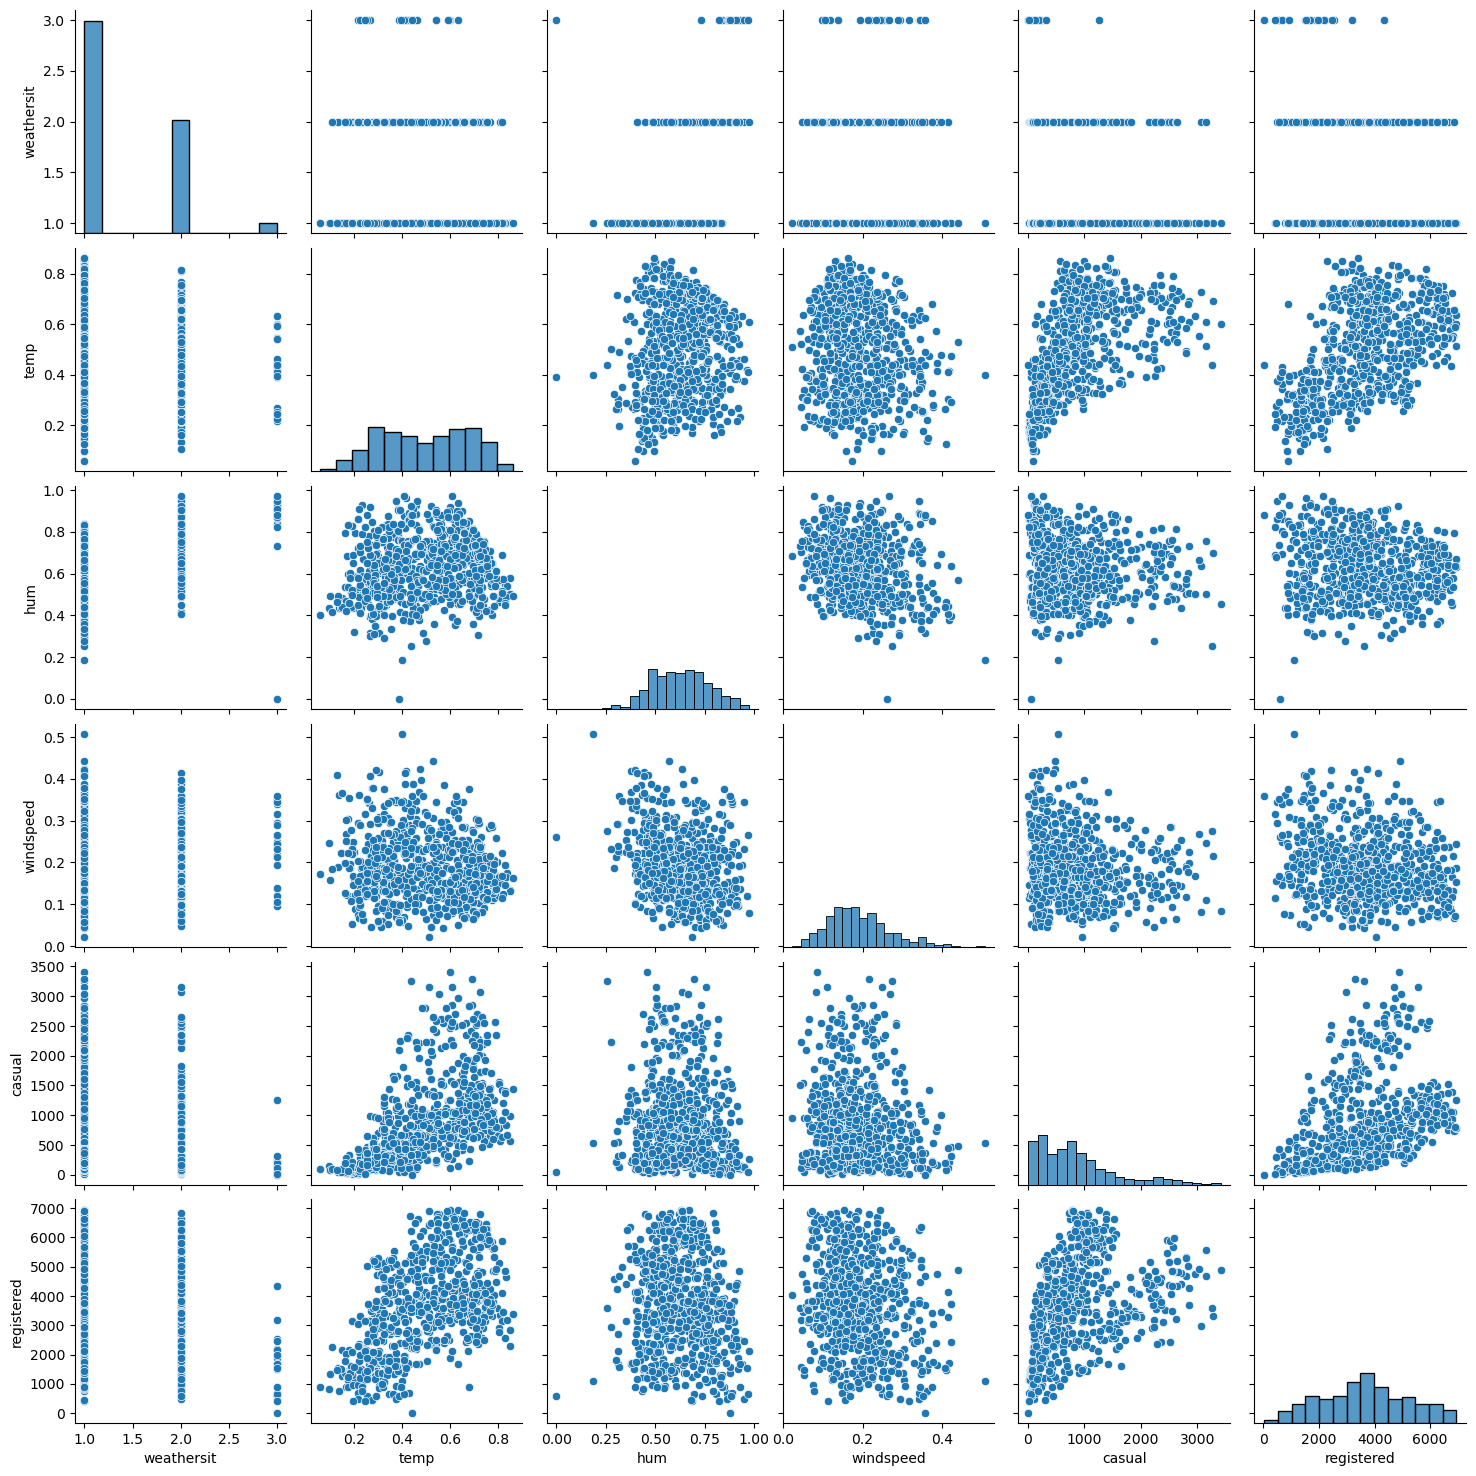

In [17]:
plt.figure(figsize=(6,6))
sns.pairplot(df )

In [24]:
for col in df.columns:
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    q_low = df[col].quantile(0.25) - 1.5 * IQR
    q_hi  = df[col].quantile(0.75) + 1.5 * IQR
    df = df[(df[col] < q_hi) & (df[col] > q_low)]

In [25]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5.856849,3.040411,3.806849,1.220548,1.020548
std,0.834093,0.397853,1.758042,0.759393,0.817643
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.000000,6.900000,2.500000,2.000000


In [3]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix ,classification_report , accuracy_score ,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier,Perceptron,LinearRegression, Ridge, SGDRegressor,LogisticRegression
from sklearn.model_selection import train_test_split

import math

In [26]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=85 )


In [7]:

sgr_model = make_pipeline(StandardScaler(),SGDClassifier(loss="hinge", penalty="l1", max_iter=1000))

sgr_model.fit(X_train, y_train)
y_predict = sgr_model.predict(X_test)
print('-----------   SGD  ---------')
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))


-----------   SGD  ---------
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.88      0.88      0.88         8
           2       0.92      1.00      0.96        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

[[10  1  0]
 [ 0  7  1]
 [ 0  0 11]]


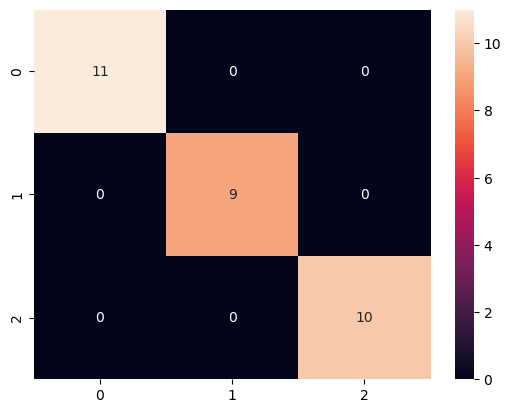

In [47]:

ax=sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xticks()
plt.show()

SGD Classifier_SVM
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [28]:
clf = make_pipeline(StandardScaler(),Perceptron(penalty='l2'))
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print('-----------   Perceptron  ---------')

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

-----------   Perceptron  ---------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]


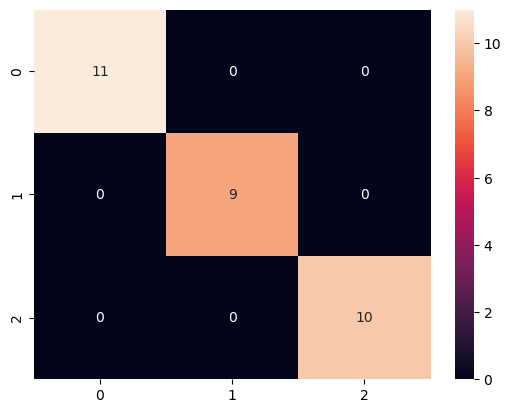

In [58]:

ax=sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xticks()
plt.show()

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
print('------ LogisticRegression --------------')

pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('LR_model', LogisticRegression(C=8, penalty='l2', multi_class='auto',max_iter=1000))])

pipe.fit(X_train, y_train)
y_predict = pipe.predict(X_test)

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

------ LogisticRegression ------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]


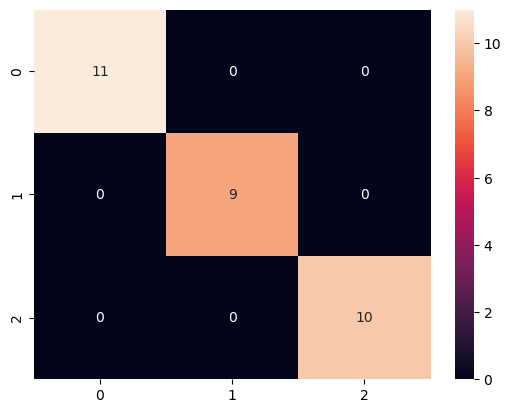

In [31]:
ax=sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xticks()
plt.show()

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

print('------ KNeighborsClassifier --------------')

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))



------ KNeighborsClassifier --------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]


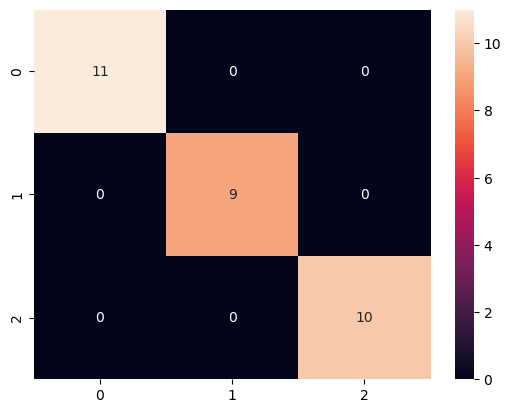

In [34]:
ax=sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xticks()
plt.show()

بالایی دارند را پاک کرده و دوباره مدلی که این کار روی آن تاثیر گذار است را امتحان کنید corrolationحال ستونی که 

  


<div dir = "rtl" style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=6 color=#F32500>
        <div  align=center>
              ابتدا با بررسی همبستگی ستون زیر حذف شد  :  
petal width (cm)    
            سپس با اجرای مجدد مدلها نتیجه بررسی شد
            میانگین مدلهاحدود ۷ درصد دقتشان کاهش داشت 
            و لاجستیک بهترین نتیجه با ۹۷ درصد شد
                    </div>
        <br/>
    </font>
</div>

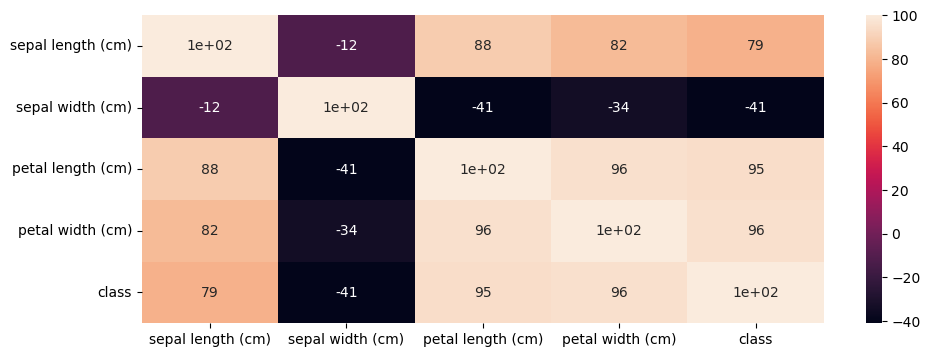

In [36]:
corr_date = df.corr().round(2)*100
fig = plt.figure(figsize =(11, 4)) 
ax=sns.heatmap(corr_date, annot=True)
plt.xticks()
plt.show()

In [43]:
X = df.iloc[:, [0,1,2]].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=85 )


In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

print('------ KNeighborsClassifier --------------')
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

------ KNeighborsClassifier --------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.82      1.00      0.90         9
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30

[[11  0  0]
 [ 0  9  0]
 [ 0  2  8]]


In [45]:
print('------ LogisticRegression --------------')

pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('LR_model', LogisticRegression(C=8, penalty='l2', multi_class='auto',max_iter=1000))])

pipe.fit(X_train, y_train)
y_predict = pipe.predict(X_test)

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

------ LogisticRegression --------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.89      0.94         9
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]


In [46]:
clf = make_pipeline(StandardScaler(),Perceptron(penalty='l2'))
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print('-----------   Perceptron  ---------')

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

-----------   Perceptron  ---------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.78      0.88         9
           2       0.91      1.00      0.95        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

[[11  0  0]
 [ 1  7  1]
 [ 0  0 10]]


In [47]:
clf = make_pipeline(StandardScaler(),Perceptron(penalty='l2'))
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print('-----------   Perceptron  ---------')

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

-----------   Perceptron  ---------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.78      0.88         9
           2       0.91      1.00      0.95        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

[[11  0  0]
 [ 1  7  1]
 [ 0  0 10]]


### try svm on below dataset and get accuracy more than 95 

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC,SVR



In [78]:
X = dfm.iloc[:, 2:13].values
y = dfm.loc[:,'cnt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=85 )

In [81]:
model = make_pipeline(preprocessing.StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
y_predict_lr= model.predict(X_test)
print("R2_SCORE: ", metrics.r2_score(y_test, y_predict_lr))
print("MSE : ", metrics.mean_squared_error(y_test, y_predict_lr))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict_lr)))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_predict_lr))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict_lr))
print("RMSE%: ", 100*round(math.sqrt(metrics.mean_squared_error(y_test, y_predict_lr)) / dfm["cnt"].mean(),2))

R2_SCORE:  0.775014899368656
MSE :  838560.1275646058
RMSE:  915.7292872703187
Mean Absolute Error (MAE):  667.9263182248882
MAPE:  0.19309379941033625
RMSE%:  20.0


In [82]:
ridge_poly_model = make_pipeline(preprocessing.StandardScaler(), 
              PolynomialFeatures(degree=3), 
              Ridge(alpha=1))
ridge_poly_model.fit(X_train, y_train)
y_predict_lr = ridge_poly_model.predict(X_test)

print("R2_SCORE: ", metrics.r2_score(y_test, y_predict_lr))
print("MSE : ", metrics.mean_squared_error(y_test, y_predict_lr))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict_lr)))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_predict_lr))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict_lr))
print("RMSE%: ", 100*round(math.sqrt(metrics.mean_squared_error(y_test, y_predict_lr)) / dfm["cnt"].mean(),2))

R2_SCORE:  0.8292606268992271
MSE :  636376.4982032698
RMSE:  797.7320967613562
Mean Absolute Error (MAE):  514.1337067948022
MAPE:  0.238464741055681
RMSE%:  18.0


In [83]:
pipe = make_pipeline(preprocessing.StandardScaler(), PolynomialFeatures(),Ridge())

model = GridSearchCV(pipe, param_grid={'polynomialfeatures__degree': [1, 2,3], 'polynomialfeatures__include_bias' :[True , False] , 'ridge__alpha': [0.5, 1,5, 10, 20,50]})
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print("R2_SCORE: ", metrics.r2_score(y_test, y_predict))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict))
print("RMSE%: ", 100*round(math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / dfm["cnt"].mean(),2))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict)))

print(model.best_score_ , model.best_params_)

R2_SCORE:  0.8552635768980166
MAPE:  0.19952278516717475
RMSE%:  16.0
RMSE:  734.4785936378335
0.8482045045839204 {'polynomialfeatures__degree': 2, 'polynomialfeatures__include_bias': False, 'ridge__alpha': 50}


In [69]:

reg_bagging = BaggingRegressor(DecisionTreeRegressor(min_samples_leaf=5), n_estimators=100, bootstrap=False, n_jobs=-1, max_samples=50)

reg_bagging.fit(X_train, y_train)
y_predict = reg_bagging.predict(X_test)


In [ ]:
pipe = make_pipeline(StandardScaler(), SVR())
clf_gridSearch = GridSearchCV(pipe, param_grid={'svr__epsilon': [0.001, 0.01, 0.1, 1, 10], 'svr__C': [0.1, 1, 10, 100]})
clf_gridSearch.fit(X_train, y_train)
y_predict = clf_gridSearch.predict(X_test)

In [75]:
print("R2_SCORE: ", metrics.r2_score(y_test, y_predict))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict)))

print("RMSE%: ", 100*round(math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / dfm["cnt"].mean(),2))
print(clf_gridSearch.best_score_ , clf_gridSearch.best_params_)

R2_SCORE:  0.7983579803247292
MAPE:  0.2754848673291777
RMSE:  866.923437488024
RMSE%:  19.0
0.7735109734592813 {'svr__C': 100, 'svr__epsilon': 10}


In [9]:
from sklearn.ensemble import BaggingRegressor

reg_bagging = BaggingRegressor(DecisionTreeRegressor(min_samples_leaf=5), n_estimators=100, bootstrap=False, n_jobs=-1, max_samples=50)

reg_bagging.fit(X_train, y_train)
y_predict = reg_bagging.predict(X_test)


In [74]:
print("R2_SCORE: ", metrics.r2_score(y_test, y_predict))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict)))

print("RMSE%: ", 100*round(math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / dfm["cnt"].mean(),2))

R2_SCORE:  0.7983579803247292
MAPE:  0.2754848673291777
RMSE:  866.923437488024
RMSE%:  19.0


In [91]:
from sklearn import utils
from sklearn.model_selection import ParameterGrid
from sklearn.dummy import DummyRegressor
best=10000000
grid = ParameterGrid({"max_samples": [0.5, 1.0],
                          "max_features": [0.5, 1.0],
                          "bootstrap": [True, False],
                          "n_estimators":[1,100],
                          "bootstrap_features": [True, False]})

if 2<1:
      # grid = ParameterGrid({"max_samples": [ 1.0],
    #                           "max_features": [ 1.0],
    #                           "bootstrap": [True],
    #                           "n_estimators":[1],
    #                           "bootstrap_features": [True]})

    # modelpoly = GridSearchCV(pipepoly, param_grid={'polynomialfeatures__degree': [1], 'polynomialfeatures__include_bias' :[True] , 'ridge__alpha': [1]})                                       
    # modelkneighbors = GridSearchCV(pipek, param_grid={'kneighborsregressor__n_neighbors': [1 ]})
    # modelsvr = GridSearchCV(pipesvr, param_grid={'svr__epsilon': [1], 'svr__C': [0.1]})
    pass
  

pipepoly = make_pipeline(preprocessing.StandardScaler(), PolynomialFeatures(),Ridge())
modelpoly = GridSearchCV(pipepoly, param_grid={'polynomialfeatures__degree': [1, 2], 'polynomialfeatures__include_bias' :[True , False] , 'ridge__alpha': [0.5, 1,5, 10, 20,50]})                                       

pipek = make_pipeline(preprocessing.StandardScaler(), KNeighborsRegressor())
modelkneighbors = GridSearchCV(pipek, param_grid={'kneighborsregressor__n_neighbors': [1,5 ]})

pipesvr = make_pipeline(preprocessing.StandardScaler(), SVR())
modelsvr = GridSearchCV(pipesvr, param_grid={'svr__epsilon': [0.001,  1, 10], 'svr__C': [0.1, 10, 100]})

for base_estimator in [
                           None,
                           modelpoly,
                           DecisionTreeRegressor(),
                           modelkneighbors,
                           modelsvr
]:
        for params in grid:
            # print(**params)
            model=BaggingRegressor(base_estimator=base_estimator, random_state=utils.check_random_state(0),**params)
            model.fit(X_train, y_train)
            y_predict= model.predict(X_test)
            
            # print(base_estimator, "R2_SCORE: ", metrics.r2_score(y_test, y_predict))
            # print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict))
            # print(math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / dfm["cnt"].mean())
            rmse=math.sqrt(metrics.mean_squared_error(y_test, y_predict))
            
            if  rmse < best:
                           best=rmse
                           bestr2=metrics.r2_score(y_test, y_predict) 
                           matrisresult=[base_estimator , params , bestr2,best ]
          
        try:
            print('estimator:',base_estimator, 'Parameters:', params, 'RMSE:' , rmse)   
        except:
            print('--------------------------------------------------------------------')
        
print('result:',matrisresult)
print("RMSE%: ", 100*round(best) / dfm["cnt"].mean(),2)
                # print("R2_SCORE: ", metrics.r2_score(y_test, y_predict))
                # print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict))
                # print(math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / dfm["cnt"].mean())

estimator: None Parameters: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10} RMSE: 870.8113611263157
estimator: GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [1, 2],
                         'polynomialfeatures__include_bias': [True, False],
                         'ridge__alpha': [0.5, 1, 5, 10, 20, 50]}) Parameters: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10} RMSE: 734.4785936378337
estimator: DecisionTreeRegressor() Parameters: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10} RMSE: 870.8113611263157
estimator: GridSearchCV(esti

In [ ]:
best result:
    
    
estimator: DecisionTreeRegressor. Parameters: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100} RMSE: 863.1040996543442
result: [None, {'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}, 
r2: 0.888974336782214, 643.282760910281]
RMSE%:  14.275093320666848 2

### SKtime

In [4]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.arima import AutoARIMA


In [77]:
y=dft.cnt
from sktime.forecasting.base import ForecastingHorizon

fh = ForecastingHorizon(
    pd.period_range("2012-12-27", periods=5, freq="D"), is_relative=False
)
cutoff = pd.Period("2012-12-26", freq="D")
fh.to_relative(cutoff)

ForecastingHorizon([1, 2, 3, 4, 5], dtype='int64', is_relative=True)

In [ ]:
y_train=dft.iloc[0:-6,-1]
y_test=dft.iloc[-5:-1,-1]

# y_train, y_test = temporal_train_test_split(y, fh=fh)
forecaster = AutoARIMA(sp=7, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])